In [ ]:
'''
Assignment #6
Rezwan-Ul-Alam (ID: 2011659042)
Md. Nur Alam Jowel (ID: 2012355042)
Raian Ruku (ID: 2013409642)

'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.load("/content/drive/MyDrive/data/kmeans2d.npy")
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)


First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


# close

In [ ]:
def find_closest_centroids(X, centroids):

    m = centroids.shape[0]
    n = X.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(n):
          distance = []
          for j in range(m):
              norm = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm)

          idx[i] = np.argmin(distance)
    return idx


def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
          points = X[idx == k]
          centroids[k] = np.mean(points, axis = 0)
    return centroids


def kmeans(X, initial_centroids, max_itr):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    for i in range(max_itr):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

def kmeans_initial_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

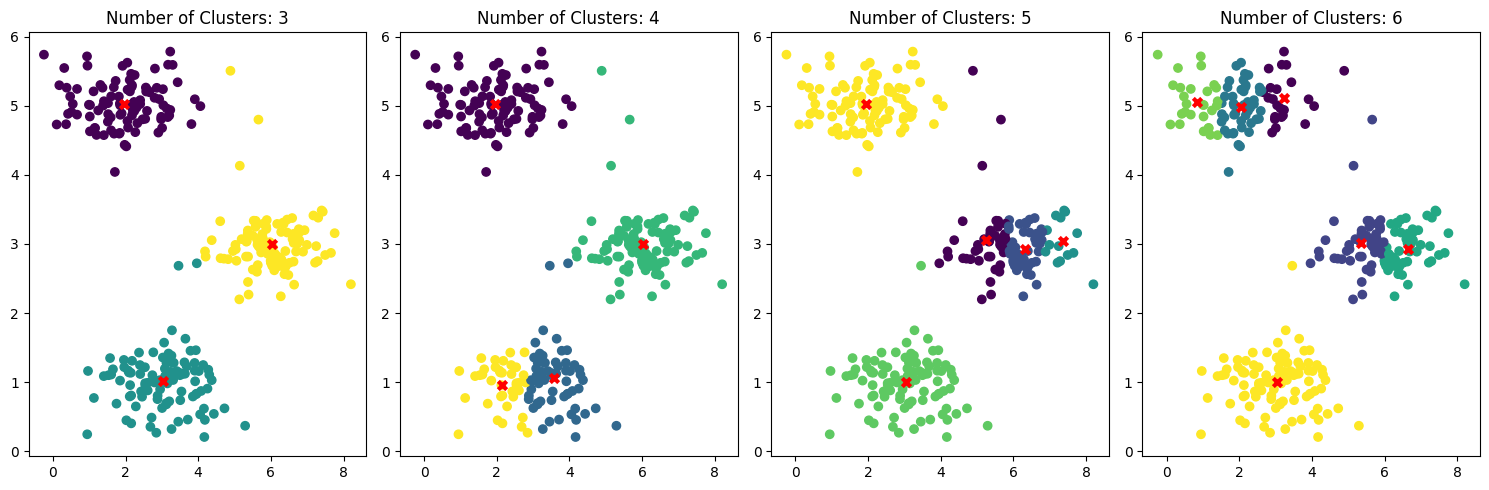

In [ ]:
maximum_clusters = 6
minimum_clusters = 3

fig, axs = plt.subplots(1, maximum_clusters - 2, figsize=(15, 5))
max_iteration = 10
#different numbers of clusters
for idx, clusters in enumerate(range(minimum_clusters, maximum_clusters + 1)):
    initial_centroid = X[np.random.choice(range(len(X)), size=clusters)]
    centroids, labels = kmeans(X, initial_centroid,max_iteration)
    axs[idx].scatter(X[:, 0], X[:, 1], c=labels)
    axs[idx].scatter(centroids[:, 0], centroids[:, 1], marker='x', c='r', linewidths=3)
    axs[idx].set_title(f"Number of Clusters: {clusters}")

plt.tight_layout()
plt.show()


# K Means On image

Shape of original_img is: (128, 128, 3)


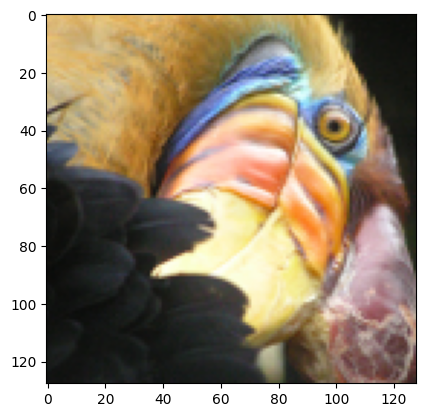

In [ ]:
original_img = plt.imread('/content/drive/MyDrive/data/bird_small.png')
plt.imshow(original_img)
print("Shape of original_img is:", original_img.shape)

# Preprocessing

In [ ]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_img.shape

(16384, 3)

In [ ]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 8 #4,16,32
max_iteration = 10

#initial_centroids = X_img[np.random.choice(range(len(X_img)), size=clusters)]
initial_centroids = kmeans_initial_centroids(X_img, K)

# Run K-Means - this takes a couple of minutes
centroids, label = kmeans(X_img, initial_centroids, max_iteration)

In [ ]:
print("Labels:", label.shape)
print("Cluster centers:", centroids.shape)

Labels: (16384,)
Cluster centers: (8, 3)


In [ ]:
#Represent image in terms of indices
X_recovered = centroids[label, :]
#Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

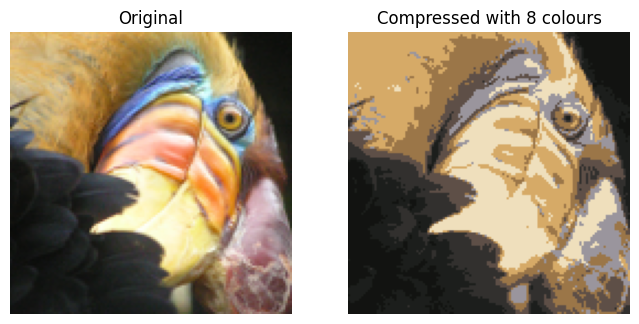

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()